<a href="https://colab.research.google.com/github/122BT0251/Sentimental-Analysis-of-Climate-Change-Post/blob/main/Sentimental_Analysis_of_Climate_change_post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import wordcloud
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [10]:
data = pd.read_csv("/content/climate_nasa.csv")

In [11]:
data.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [12]:
data.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [13]:
data.shape

(522, 5)

In [14]:
data.isnull().sum()

,0
date,0
likesCount,0
profileName,0
commentsCount,278
text,18


In [15]:
data.text.fillna(value = '' ,inplace = True)
data['reviews'] = data['text']
data.drop(columns = ['text'] , axis =1 , inplace = True)

<ipython-input-15-289cd05b7589>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.text.fillna(value = '' ,inplace = True)


In [16]:
data.describe(include = 'all')

,date,likesCount,profileName,commentsCount,reviews
count,522,522.000000,522,244.000000,522
unique,522,NaN,483,NaN,504
top,2022-09-07T17:12:32.000Z,NaN,fbc7d1a96db0c682c8caaaf292d13527b1483b341da109...,NaN,
freq,1,NaN,3,NaN,18
mean,NaN,4.720307,NaN,8.696721,NaN
std,NaN,12.053556,NaN,12.266176,NaN
min,NaN,0.000000,NaN,1.000000,NaN
25%,NaN,0.000000,NaN,2.000000,NaN
50%,NaN,1.000000,NaN,5.000000,NaN
75%,NaN,4.000000,NaN,10.000000,NaN


In [17]:
data.head()

,date,likesCount,profileName,commentsCount,reviews
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [20]:

def replace_urls(in_string, replacement=None):
    # """Replace URLs in strings. See also: ``bit.ly/PyURLre``

    # Args:
    #     in_string (str): string to filter
    #     replacement (str or None): replacment text. defaults to '<-URL->'

    # Returns:
    #     str
    # """
    replacement = '<-URL->' if replacement is None else replacement
    pattern = re.compile('(https?://)?(\w*[.]\w+)+([/?=&]+\w+)*')
    return re.sub(pattern, replacement, in_string)

In [21]:
clean_url_df = data

clean_url_df['reviews'] = [replace_urls(text,"") for text in clean_url_df['reviews']]
#remove punctuations
RE_PUNCTUATION = '|'.join([re.escape(x) for x in string.punctuation])
clean_url_df['reviews'] = clean_url_df['reviews'].str.replace(RE_PUNCTUATION, "")

In [22]:
print(clean_url_df.shape);clean_url_df.head()

(522, 5)


,date,likesCount,profileName,commentsCount,reviews
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


**TEXT BLOB Analysis**
Anlyze the sentiments of all tweet . It gives polarity and subjectivity of each tweet text.


*   Positive sentiment : polarity >= 0

*   Negative sentiment : polarity < 0



In [24]:
# Create textblob objects of the tweets
list_sentiment_polarity = []
list_sentiment_subjectivity = []
# list_sentiment_object = []
list_sentiment = []


for tweet in clean_url_df['reviews']:

#     print(tweet)
    sentiment_objects = TextBlob(tweet)
    polarity = sentiment_objects.polarity
    if  polarity >= 0:
        list_sentiment.append('positive')
    else:
        list_sentiment.append('negative')
    list_sentiment_polarity.append(polarity)

    list_sentiment_subjectivity.append(sentiment_objects.subjectivity)
#     list_sentiment_object.append((str(sentiment_objects)))
#     print(sentiment_objects)


clean_url_df["tb_sentiment_polarity"] = list_sentiment_polarity
clean_url_df["tb_sentiment_subjectivity"] = list_sentiment_subjectivity
# clean_url_df["sentiment_text"] = list_sentiment_object
clean_url_df["textBlob_sentiment"] = list_sentiment


clean_url_df.head()

,date,likesCount,profileName,commentsCount,reviews,tb_sentiment_polarity,tb_sentiment_subjectivity,textBlob_sentiment
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...,0.000000,0.500000,positive
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...,0.600000,0.600000,positive
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,0.000000,0.000000,positive
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...,0.053571,0.744048,positive
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",-0.375000,0.625000,negative


# VADER(Valence Aware Dictionary and sentiment Reasoner)
is a lexicon and rule based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

This scoring will be used in visualizations

**About the Scoring**


*   The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme postive). This is the most useful metric if you want a single unidimensional  measure of sentiment for a given sentence.Calling it a 'normalized, weighted composite score' is accurate.

*   It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive , neutral , or negative.Typical threshold values (used in the literature cited on this page) are:



1.   Positive Sentiment : compound score >= 0.05

2.   Neutral Sentiment : compound score >-0.05 and compound score < 0.05



3.   Negative Sentiment : compound <= -0.05








In [32]:
# Install and import nltk
!pip install nltk
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

#initialize sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
vader_sentiment = []
for tweet in clean_url_df['reviews']:
    scores = analyzer.polarity_scores(tweet)
    compound_list.append(scores["compound"])
    positive_list.append(scores["pos"])
    negative_list.append(scores["neg"])
    neutral_list.append(scores["neu"])

    if scores['compound'] >= 0.05:
        vader_sentiment.append('Positive')
    elif scores['compound'] > -0.05 and scores['compound'] < 0.05:
         vader_sentiment.append('Neutral')
    elif scores['compound'] <= -0.05:
        vader_sentiment.append('Negative')

clean_url_df["vader_compound"] = compound_list
clean_url_df["vader_pos"] = positive_list
clean_url_df["vader_neg"] = negative_list
clean_url_df["vader_neu"] = neutral_list
clean_url_df["V_Sentiment"] = vader_sentiment

In [34]:

clean_url_df.to_csv('/content/climate_nasa.csv', index=False)

In [37]:
term_search_df = clean_url_df.groupby('reviews')
compounds = clean_url_df["vader_compound"]
df_avg_sentiment = pd.DataFrame(term_search_df["vader_compound"].mean())

df_avg_sentiment.reset_index(inplace=True)
df_avg_sentiment.to_csv('/content/climate_nasa.csv', index=False)
df_avg_sentiment.head()

,reviews,vader_compound
0,,0.0000
1,\nNASA wants you to believe that man is the so...,0.9344
2,\nSave lives and land,0.4939
3,"Glaciers are melting, sea levels are rising, ...",0.4939
4,How has The Sun changed in 100 years . it war...,0.2960


In [43]:
term_location_df = clean_url_df.groupby('reviews')
compounds = clean_url_df["vader_compound"]
df_avg_loc_sentiment = pd.DataFrame(term_location_df["vader_compound"].mean())

df_avg_loc_sentiment.reset_index(inplace=True)
df_avg_loc_sentiment.to_csv('/content/climate_nasa.csv', index=False)

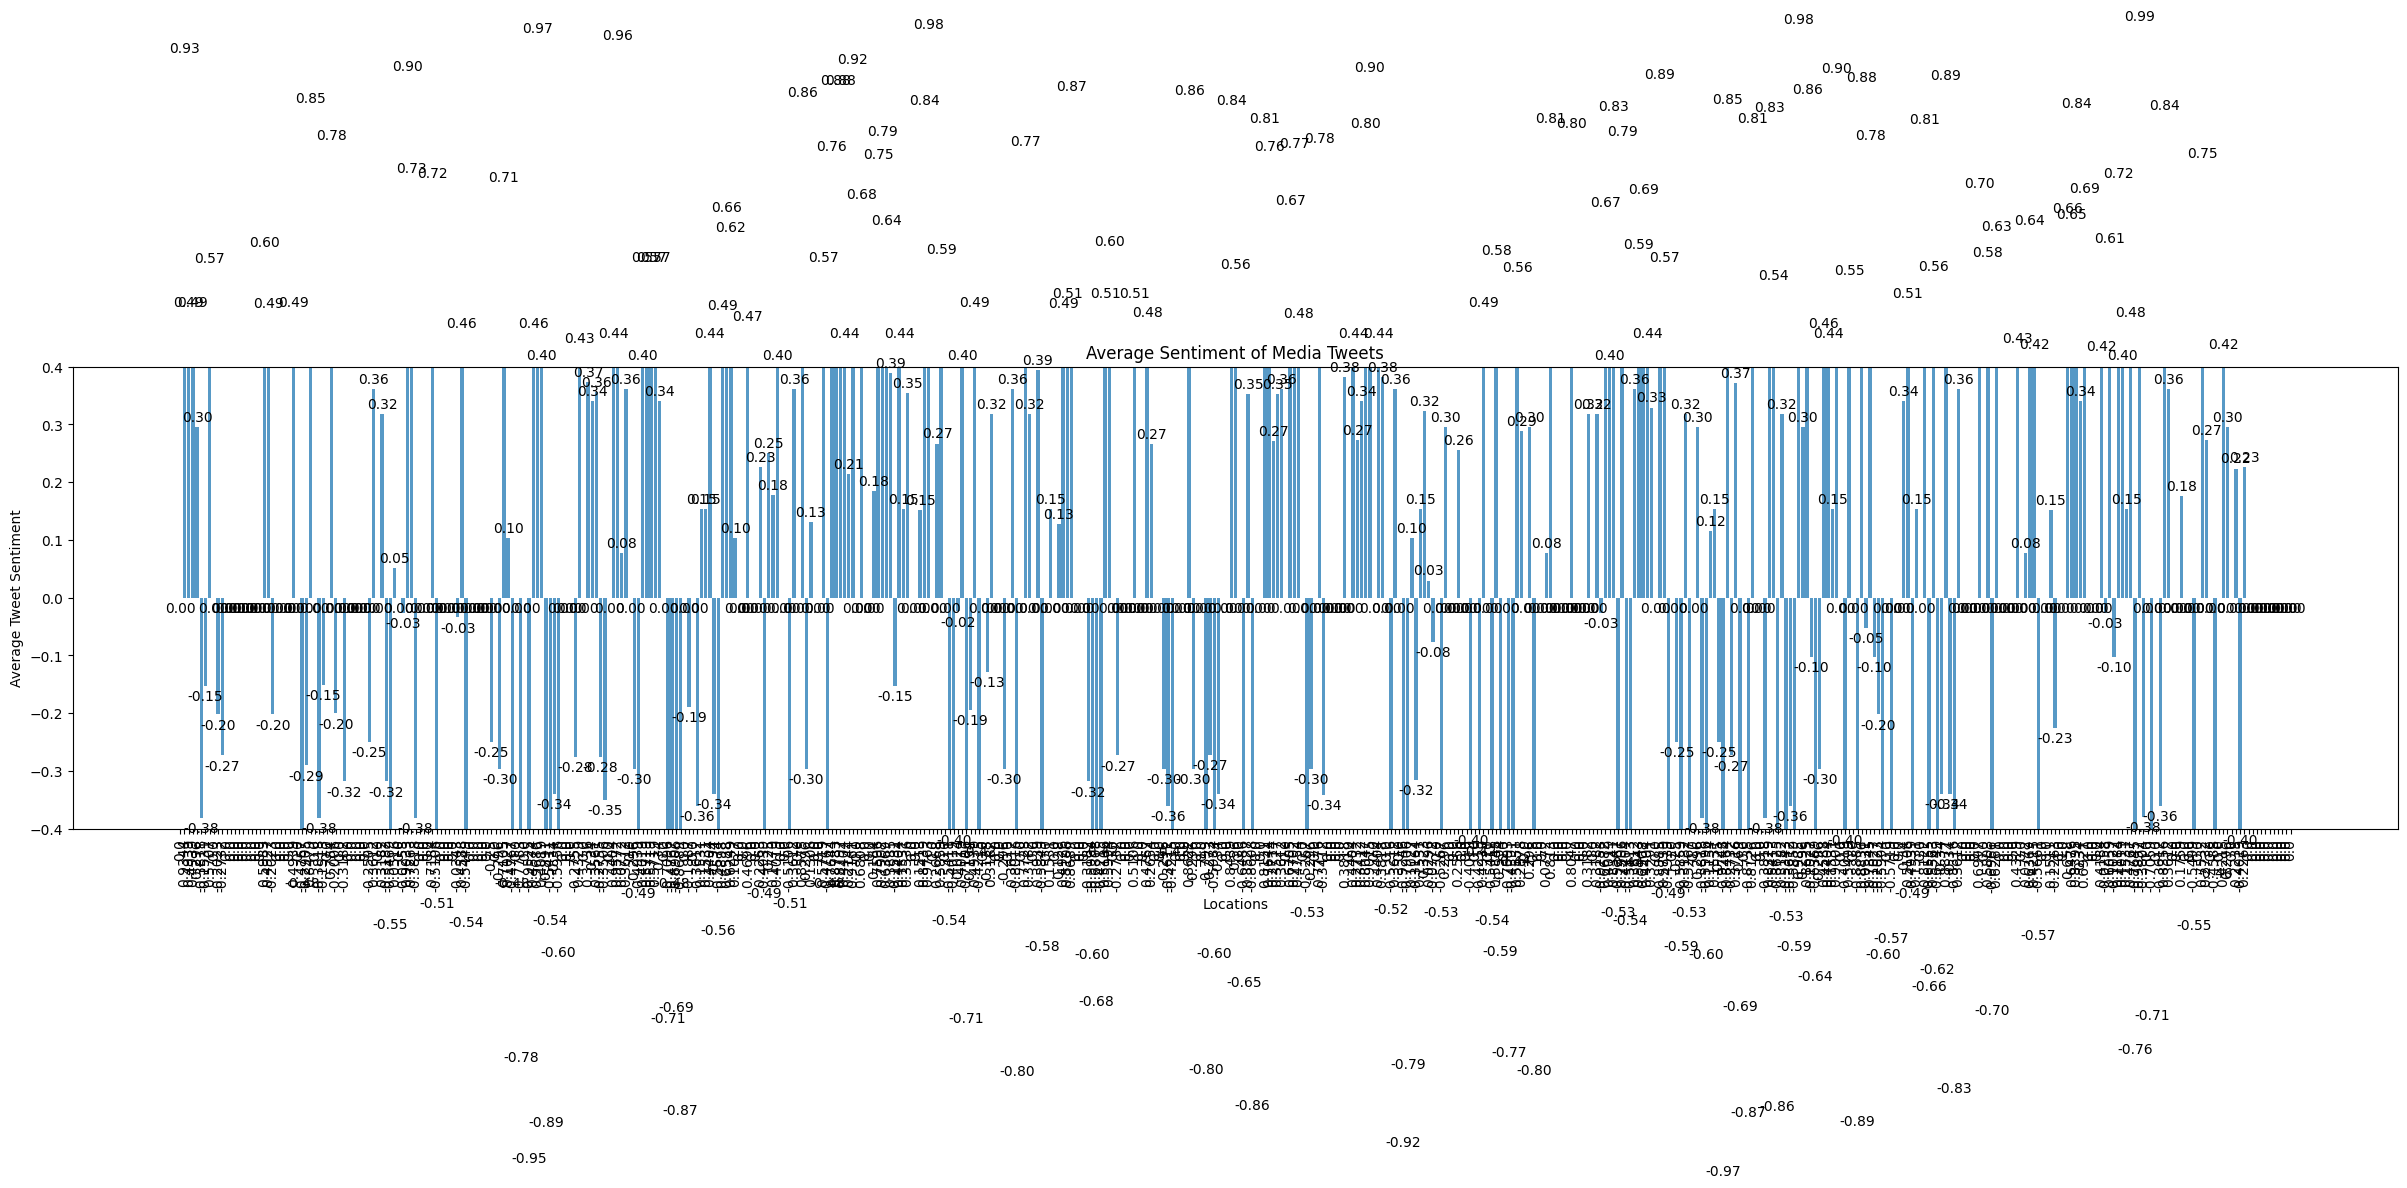

In [51]:
plt.figure(figsize = (30,6))
tick_locations = range(len(df_avg_loc_sentiment))
plt.bar(tick_locations, df_avg_loc_sentiment["vader_compound"], alpha=0.75)
plt.title(f"Average Sentiment of Media Tweets")
plt.xlabel("Locations")
plt.ylabel("Average Tweet Sentiment")
plt.xticks(tick_locations, df_avg_loc_sentiment["vader_compound"], rotation='vertical')
plt.ylim(-0.4,0.4)
for i in range(len(df_avg_loc_sentiment)):
    if df_avg_loc_sentiment["vader_compound"][i] > 0:
        plt.text(tick_locations[i],df_avg_loc_sentiment["vader_compound"][i] + 0.01,"{0:.2f}".format(df_avg_loc_sentiment["vader_compound"][i]), ha="center")
    else:
        plt.text(tick_locations[i],df_avg_loc_sentiment["vader_compound"][i] - 0.025,"{0:.2f}".format(df_avg_loc_sentiment["vader_compound"][i]), ha="center")
plt.show()

In [41]:
clean_url_df['tb_sentiment_polarity'].value_counts()

,count
tb_sentiment_polarity,
0.000000,225
0.500000,14
0.200000,13
0.100000,9
0.250000,9
...,...
0.150000,1
0.070000,1
0.231481,1


In [40]:

clean_url_df.isnull().sum()

,0
date,0
likesCount,0
profileName,0
commentsCount,278
reviews,0
tb_sentiment_polarity,0
tb_sentiment_subjectivity,0
textBlob_sentiment,0
vader_compound,0
vader_pos,0
